In [1]:
!pip3 install sklearn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

input_file = "data/WineNewGBTDataSet.csv"
col_Names=["fixedAcidity",
    "volatileAcidity",
    "citricAcid",
    "residualSugar",
    "chlorides",
    "freeSulfurDioxide",
    "totalSulfurDioxide",
    "density",
    "pH",
    "sulphates",
    "Alcohol",
    "Quality"]

wine_df = pd.read_csv(input_file,sep=";",header=None, names=col_Names)
wine_df.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Excellent
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Poor


In [3]:
#check labels
print(wine_df.Quality.unique())

['Poor' 'Excellent' '1']


In [4]:
#clean up and encode labels
wine_df.Quality.replace('1',"Excellent",inplace=True)
wine_df.describe()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,Alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [5]:
#encode labels 
wine_df.Quality = pd.Categorical(wine_df.Quality)
wine_df['Label'] = wine_df.Quality.cat.codes
wine_df.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,Alcohol,Quality,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Poor,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Poor,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Poor,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Excellent,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Poor,1


In [6]:
#random forest Classifier Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df.iloc[:,:11],
                                                    wine_df['Label'],
                                                    test_size=0.3, 
                                                    random_state=30)

#parameters for grid search
rfc = RandomForestClassifier(random_state=10)

GS_params = { 
    'n_estimators': [50,70,90],
    'max_depth' : [5,7,9]
}

#Cross Validation Grid Search
CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=GS_params, 
                      cv= 3,
                      n_jobs=-1,
                      verbose=1)
CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [7]:
#final Model
rfc_final = CV_rfc.best_estimator_
#Show Best Parameters 
print(CV_rfc.best_params_)

#Predict on test dataset
y_true, y_pred = y_test, rfc_final.predict(X_test)
y_pred_proba = rfc_final.predict_proba(X_test)[:,1]

{'max_depth': 9, 'n_estimators': 90}


In [8]:
#Evaluation metrics matrix
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       251
           1       0.84      0.73      0.78       229

    accuracy                           0.80       480
   macro avg       0.81      0.80      0.80       480
weighted avg       0.81      0.80      0.80       480



In [9]:
# Calcultate points for ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
# get Area Under ROC curve
auc = roc_auc_score(y_true, y_pred)
# get False Positive Rate and True Positive Rate  
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

<IPython.core.display.Javascript object>


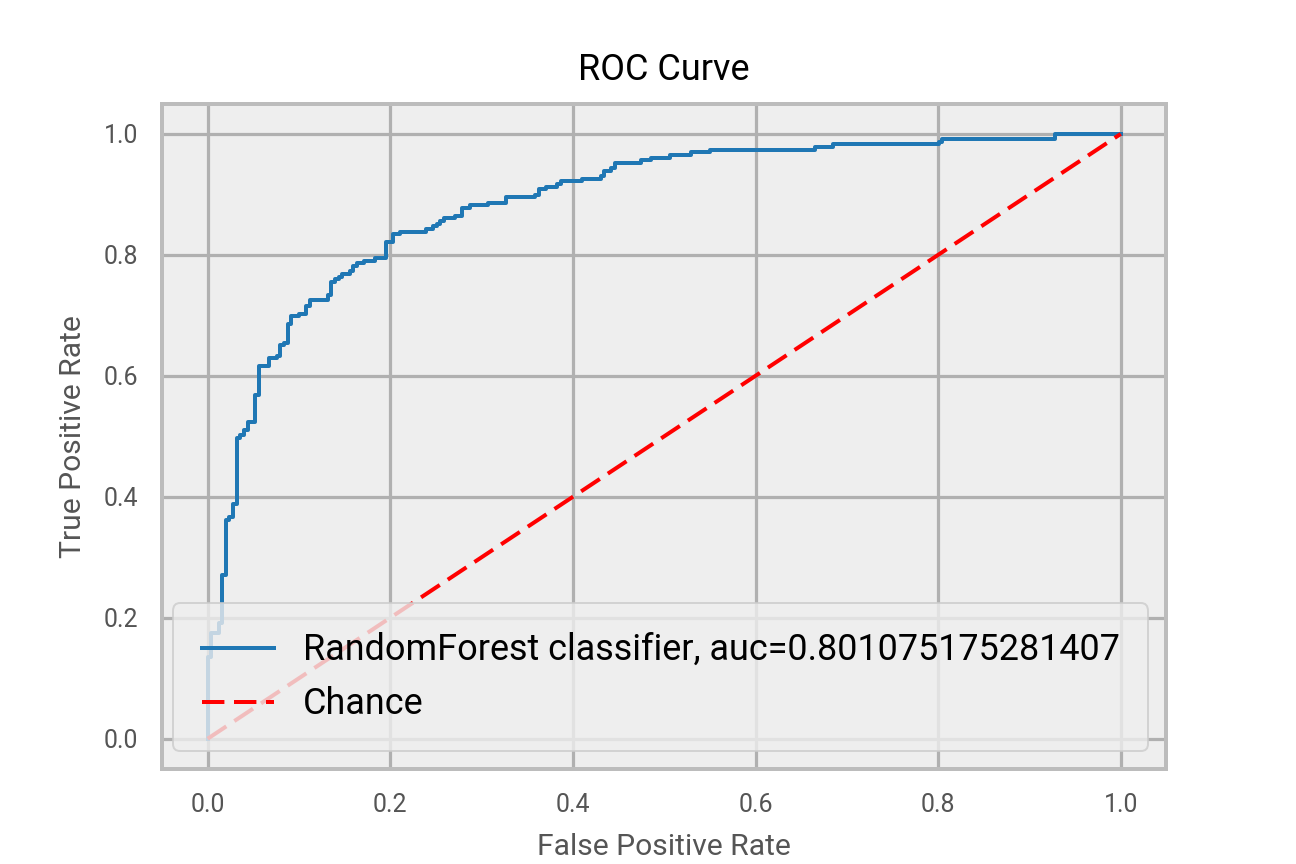

In [10]:
#Plot ROC Curve
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label="RandomForest classifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--',color='r',label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

In [ ]:
#Save Model
from joblib import dump
dump(rfc_final, 'sklearn_model.joblib') 